In [1]:
'''
Stakeholders:
1. House flipping (old/unlivable houses)

Flipping:
1. Houses not up to code, or bad
2. Zip codes with highest sale prices
3. Old houses/not renovated
4. 
'''

'\nStakeholders:\n1. House flipping (old/unlivable houses)\n\nFlipping:\n1. Houses not up to code, or bad\n2. Zip codes with highest sale prices\n3. Old houses/not renovated\n4. \n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('data/kc_house_data.csv')

'''
Info on data can be found here:
https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r
'''

'\nInfo on data can be found here:\nhttps://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r\n'

In [46]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2014
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2015
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2014
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,2015


In [4]:
# Cleaning dat data

data['yr_renovated'].fillna(value=0.0, inplace=True)
data['waterfront'].fillna(0.0, inplace=True)

In [5]:
data['year'] = pd.DatetimeIndex(data['date']).year
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2014
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2015
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2014
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,2015


In [6]:
data['zipcode'] = data['zipcode'].astype('str')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  object 
 17  lat            21597 non-null  float64
 18  long  

KeyError: 'logprice'

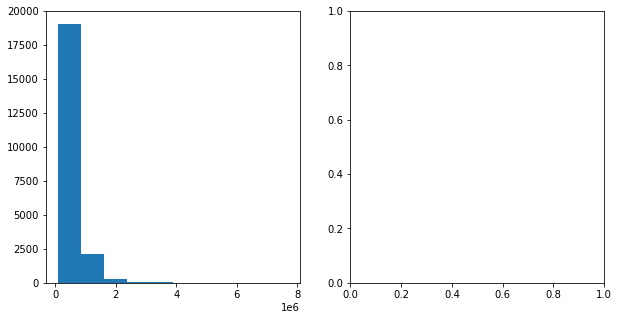

In [8]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(10,5))

ax1.hist(data['price'])
ax2.hist(data['logprice']);

In [130]:
data['logprice'] = np.log(data['price'])

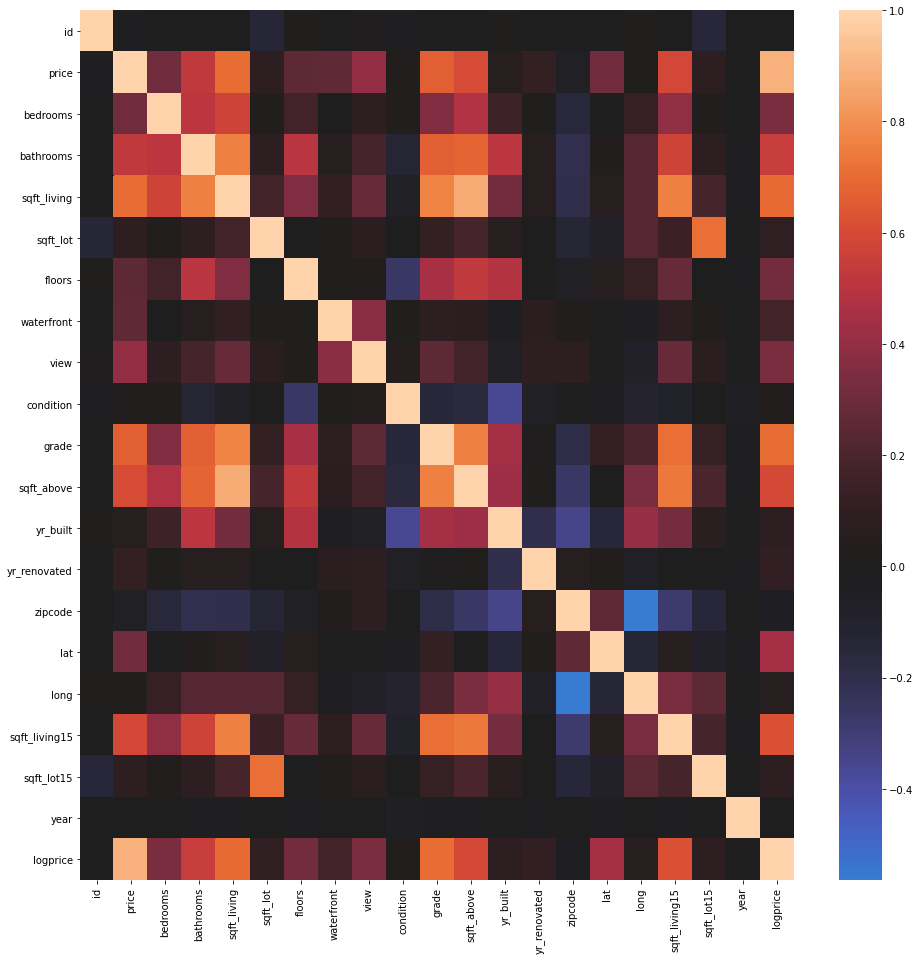

In [131]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,16)) 
ax = sns.heatmap(data.corr(), center=0);

In [132]:
data.corr()['price'].sort_values(ascending=False)

price            1.000000
logprice         0.891745
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
year             0.003727
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

In [133]:
data.corr()['logprice'].sort_values(ascending=False)

logprice         1.000000
price            0.891745
grade            0.703720
sqft_living      0.695185
sqft_living15    0.619326
sqft_above       0.601579
bathrooms        0.551249
lat              0.448837
view             0.345466
bedrooms         0.343360
floors           0.310630
waterfront       0.170720
yr_renovated     0.106867
sqft_lot         0.100025
sqft_lot15       0.092281
yr_built         0.080583
long             0.050862
condition        0.038918
year             0.004972
id              -0.003751
zipcode         -0.038788
Name: logprice, dtype: float64

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

high_corr = ['price', 'grade', 'sqft_living', 'sqft_living15']

high_corr_df = data[high_corr]
high_corr_df.head()


,price,grade,sqft_living,sqft_living15
0,221900.0,7,1180,1340
1,538000.0,7,2570,1690
2,180000.0,6,770,2720
3,604000.0,7,1960,1360
4,510000.0,8,1680,1800


In [11]:
outcome = 'price'
predictors = high_corr_df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data = high_corr_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     8282.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:55:42   Log-Likelihood:            -2.9912e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21593   BIC:                         5.983e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.988e+05   1.34e+04    -44.751      0.000   -6.25e+05   -5.73e+05
grade          9.633e+04   2374.911     40.561      0.000    9.17e+04    1.01e+05
sqft_living     178.3426      3.249     54.892      0.000     171.974     184.711
sqft_living15    15.2814      4.020      3.802      0.000       7.402      23.161
==============================================================================
Omnibus:                    17073.030   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1043757.328
Skew:                           3.328   Prob(JB):                         0.00
Kurtosis:                      36.400   Cond. No.                     2.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# Going to use OneHotEncoder for zipcode
cat_zip = data[['zipcode']]

ohe = OneHotEncoder(categories='auto', drop=['98001'], sparse=False, handle_unknown='error')

ohe.fit(cat_zip)

ohe.__dict__

{'categories': 'auto',
 'sparse': False,
 'dtype': numpy.float64,
 'handle_unknown': 'error',
 'drop': array(['98001'], dtype=object),
 'categories_': [array(['98001', '98002', '98003', '98004', '98005', '98006', '98007',
         '98008', '98010', '98011', '98014', '98019', '98022', '98023',
         '98024', '98027', '98028', '98029', '98030', '98031', '98032',
         '98033', '98034', '98038', '98039', '98040', '98042', '98045',
         '98052', '98053', '98055', '98056', '98058', '98059', '98065',
         '98070', '98072', '98074', '98075', '98077', '98092', '98102',
         '98103', '98105', '98106', '98107', '98108', '98109', '98112',
         '98115', '98116', '98117', '98118', '98119', '98122', '98125',
         '98126', '98133', '98136', '98144', '98146', '98148', '98155',
         '98166', '98168', '98177', '98178', '98188', '98198', '98199'],
        dtype=object)],
 'drop_idx_': array([0], dtype=object)}

In [135]:
cat_zip_encoded = ohe.transform(cat_zip).astype('int')

cat_zip_encoded

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [136]:
cat_zip_encoded = pd.DataFrame(cat_zip_encoded, columns = ohe.categories_[0], index=data.index)
cat_zip_encoded

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
encoded_data = data.copy()
encoded_data.drop('zipcode', axis=1, inplace=True)

In [138]:
encoded_data = pd.concat([encoded_data, cat_zip_encoded], axis =1)
encoded_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
encoded_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
cor = encoded_data.corr()['logprice'].abs()
so = cor.sort_values(ascending=False, kind='quicksort')
with pd.option_context('display.max_rows', 100):
    print(so)

logprice         1.000000
price            0.891745
grade            0.703720
sqft_living      0.695185
sqft_living15    0.619326
sqft_above       0.601579
bathrooms        0.551249
lat              0.448837
view             0.345466
bedrooms         0.343360
floors           0.310630
98004            0.222649
98040            0.186735
waterfront       0.170720
98023            0.156488
98112            0.156042
98168            0.150100
98006            0.150083
98042            0.137779
98001            0.137450
98002            0.130129
98039            0.130107
98075            0.120469
98033            0.118826
98198            0.112345
98003            0.110649
yr_renovated     0.106867
98178            0.102879
98199            0.101801
98105            0.100427
98106            0.100224
sqft_lot         0.100025
98055            0.099859
98030            0.099730
98031            0.099657
98032            0.094192
98092            0.093413
sqft_lot15       0.092281
98074       

In [141]:
repair_homes = data[data['grade'] < 6]
livable_homes.shape

(21327, 21)

In [142]:
livable_homes = data[data['grade'] >= 6]
livable_homes.shape

(21327, 23)

In [143]:
first_time_homes = livable_homes[livable_homes['grade'] <= 10]
first_time_homes.shape

(20826, 23)

In [144]:
repair_homes.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
logprice         0
dtype: int64

In [145]:
repair_homes.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,logprice
36,9435300030,5/28/2014,550000.0,4,1.00,1660,34848,1.0,0.0,0.0,...,730.0,1933,0.0,98052,47.6621,-122.132,2160,11467,2014,13.217674
166,2009000370,2/19/2015,269950.0,2,1.75,1340,7250,1.0,0.0,0.0,...,640.0,1949,0.0,98198,47.4080,-122.327,1830,9750,2015,12.505992
263,1400300055,4/28/2015,425000.0,2,1.00,770,5040,1.0,0.0,0.0,...,0.0,1930,0.0,98144,47.5964,-122.299,1330,2580,2015,12.959844
264,2123039032,10/27/2014,369900.0,1,0.75,760,10079,1.0,1.0,4.0,...,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267,2014,12.820988
350,7325600160,6/4/2014,299000.0,1,0.75,560,12120,1.0,0.0,0.0,...,0.0,1967,0.0,98014,47.6750,-121.854,1300,19207,2014,12.608199


In [146]:
repair_homes.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
logprice         0
dtype: int64

In [18]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='geoapiExercises')

In [44]:
Latitude = "47.3341"
Longitude = "-122.282"
  
location = geolocator.reverse(Latitude+","+Longitude)

In [45]:
location.raw['address']

{'house_number': '29840',
 'road': '42nd Avenue South',
 'town': 'Auburn',
 'county': 'King County',
 'state': 'Washington',
 'postcode': '98001',
 'country': 'United States',
 'country_code': 'us'}

In [47]:
Latitude = "47.5112"
Longitude = "-122.257"
  
location = geolocator.reverse(Latitude+","+Longitude)

In [48]:
location.raw

{'place_id': 148348822,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 236673600,
 'lat': '47.5112302',
 'lon': '-122.25676111324441',
 'display_name': '10012, 61st Avenue South, Rainier Beach, Seattle, King County, Washington, 98178, United States',
 'address': {'house_number': '10012',
  'road': '61st Avenue South',
  'neighbourhood': 'Rainier Beach',
  'city': 'Seattle',
  'county': 'King County',
  'state': 'Washington',
  'postcode': '98178',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['47.511189', '47.5112943', '-122.2568571', '-122.2566651']}

In [54]:
def get_city(lat, long):
    location = geolocator.reverse(str(lat) +','+ str(long))
    add_dict = location.raw['address']
    if 'city' in add_dict:
        return add_dict['city']
    elif 'town' in add_dict:
        return add_dict['town']
    else:
        return 'Not Found'

In [40]:
def get_county(lat, long):
    location = geolocator.reverse(str(lat) +','+ str(long))
    return location.raw['address']['county']

In [55]:
data['city'] = data.apply(lambda x: get_city(x['lat'], x['long']), axis = 1)

KeyboardInterrupt: 